In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Example 2.1
# 1 indicates blue marble and 0 indicates white marble
possibilities = np.array([[0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0], [1, 1, 1, 1]])
observed = np.array([1, 0, 1])

# Find number of ways to observe the observed given each possibility
num_ways_to_observe = np.vstack([(possibilities == o).sum(axis=1) for o in observed]).prod(axis=0)
probabilities = num_ways_to_observe / sum(num_ways_to_observe)
print("Probabilities of having n blue marbles:", list(enumerate(probabilities)))


Probabilities of having n blue marbles: [(0, 0.0), (1, 0.15), (2, 0.4), (3, 0.45), (4, 0.0)]


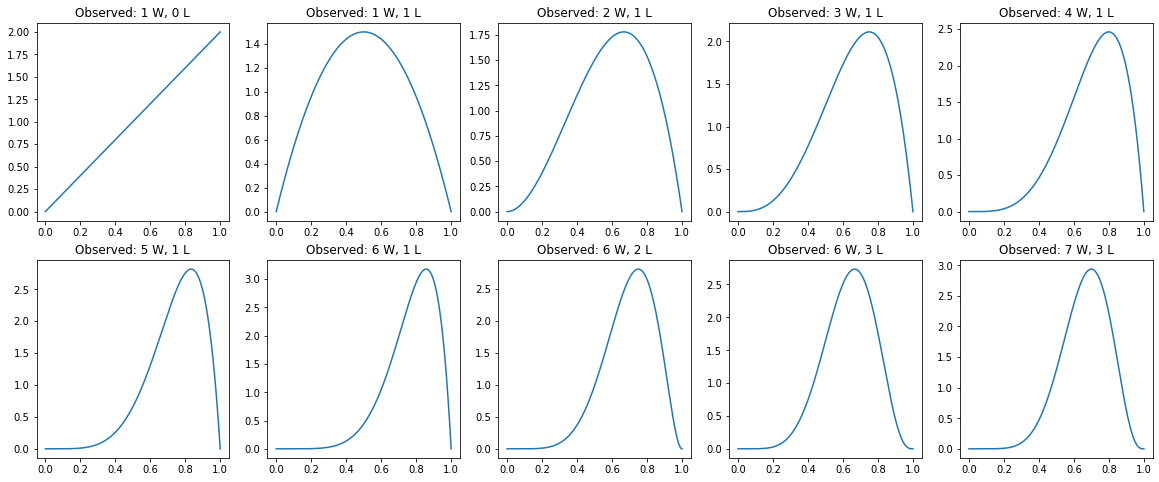

In [30]:
ps = np.linspace(0, 1, 1000)
prior = np.ones(1000)
true_p = 0.7
num_trials = 10
np.random.seed(0)
observed = np.random.binomial(1, true_p, num_trials)

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(num_trials):
    multiplier = ps if observed[i] else 1 - ps # Probability of getting result given each p in ps
    posterior = prior * multiplier
    posterior = len(ps) * posterior / sum(posterior) # normalize posterior so that it is a PDF
    prior = posterior # Posterior becomes prior for next iteration

    # Plot probabilities and probability density function
    axis = axs[i//5, i % 5]
    water = observed[:i+1].sum()
    axis.set_title("Observed: {w} W, {l} L".format(w=water, l=i-water+1))
    axis.plot(ps, posterior)
plt.show()
    

# Practice Problems

## 2M1

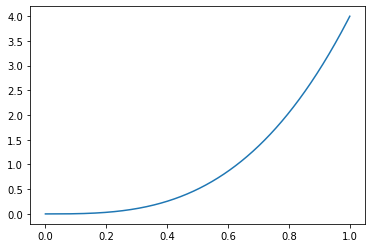

Total Area Under Curve: 1


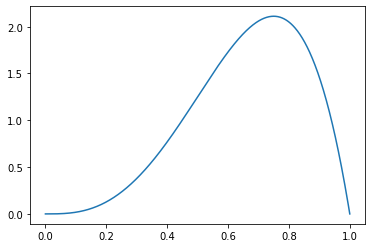

Total Area Under Curve: 1


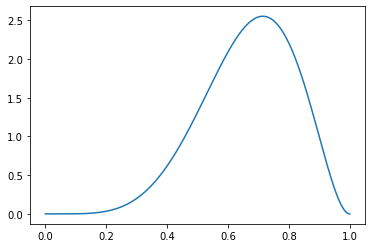

Total Area Under Curve: 1


In [43]:

prior_2m1 = np.ones(1000)

def get_posterior(observations, prior):
    """Get posterior distribution given observations and prior as numpy arrays.
    
    Assumes that multiplier will be probability or 1 - probability depending on event."""    
    for observation in observations:
        multiplier = ps if observation else 1 - ps
        posterior = prior * multiplier
        posterior = len(prior) * posterior / sum(posterior)
        prior = posterior
    return posterior

def plot_posterior(observations, prior):
    ps = np.linspace(0, 1, 1000)
    plt.plot(ps, get_posterior(observations, prior))
    plt.show()

p1 = np.array([1, 1, 1])
p2 = np.array([1, 1, 1, 0])
p3 = np.array([0, 1, 1, 0, 1, 1, 1])

def plot_posteriors(prior, *obs):
    """Plot posteriors for all given sets of observations and prior."""
    for p in obs:
        plot_posterior(p, prior)
        print("Total Area Under Curve: {0}".format(round(get_posterior(p, prior).sum() / len(prior)), 2)) # Make sure that total area under curve is close to 1

plot_posteriors(prior_2m1, p1, p2, p3)

## 2M2


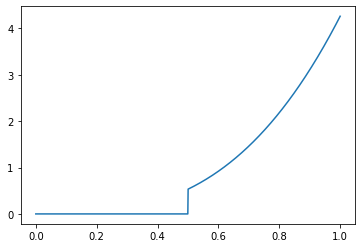

Total Area Under Curve: 1


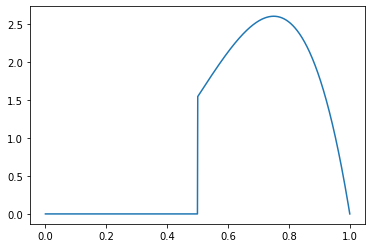

Total Area Under Curve: 1


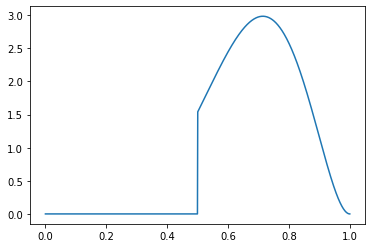

Total Area Under Curve: 1


In [44]:
prior_2m2 = (np.linspace(0, 1, 1000) >= 0.5).astype(int)
prior_2m2 = len(prior_2m2) * prior_2m2 / prior_2m2.sum()
plot_posteriors(prior_2m2, p1, p2, p3)

## 2H2

In [51]:
p_species_a_twins = 0.1
p_species_b_twins = 0.2
p_species_a_single = 1 - p_species_a_twins
p_species_b_single = 1 - p_species_b_twins
p_species_a = p_species_b = 0.5

p_species_a_given_twins = (p_species_a_twins * p_species_a) / (p_species_a * p_species_a_twins + p_species_b * p_species_b_twins)
print(round(p_species_a_given_twins, 4) * 100, "%", sep="")

33.33%


In [52]:
prior_2h3 = np.array([0.5, 0.5])


p_species_b_given_twins = 1 - p_species_a_given_twins

p_species_a_given_single = (p_species_a_single * p_species_a) / (p_species_a_single * p_species_a + p_species_b_single * p_species_b)
p_species_b_given_single = 1 - p_species_a_given_single

def get_posteriors_2h3():
    """Modified multiplier for events.
    
    Let 1 be event of twins and 0 be event of single."""
    for o in observations:
        twin_mult = np.array([p_species_a_given_twins, p_species_b_given_twins])
        single_mult = np.array([p_species_a_given_single, p_species_b_given_single])
        multiplier = twin_mult if o else single_mult
        posterior = prior * multiplier
        posterior = len(prior) * posterior / sum(posterior)
        prior = posterior
    return posterior


plot_posteriors(prior_2h3, np.array([1, 0]))


ValueError: operands could not be broadcast together with shapes (2,) (1000,) 